In [1]:
from matplotlib.ticker import LinearLocator, MultipleLocator, AutoMinorLocator
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
from astropy import units as u
import sys
import site
import matplotlib.pyplot as plt
from math import *
from tkinter import *
import astropy.units as u
import numpy as np
import pandas as pd
import plotly.express as px
import datetime
import seaborn as sns

In [2]:
fits = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\fits_thesis.xlsx')
guess = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\thesis_guess.xlsx')


In [3]:
data = pd.concat([fits, guess], axis=1)
#data.query('final_fit_type == "broken_cut"', inplace = True)

In [4]:
step_ept_het = data.where((data.type_of_fit == "step_ept_het"), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept = data.where((data.type_of_fit == "step_ept") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het = data.where((data.type_of_fit == "ept_het")  , np.nan)
step = data.where((data.type_of_fit == "step" ) , np.nan)
ept = data.where((data.type_of_fit == "ept") , np.nan)


In [5]:
n_step_ept_het = str(step_ept_het['break_point_mev'].count())
n_step_ept = str(step_ept['break_point_mev'].count())
n_ept_het = str(ept_het['break_point_mev'].count())
n_step = str(step['break_point_mev'].count())
n_ept = str(ept['break_point_mev'].count())

mean_step_ept_het = np.round(step_ept_het['break_point_mev'].mean()*1000,decimals=1)
mean_step_ept = np.round(step_ept['break_point_mev'].mean()*1000,decimals=1)
mean_step = np.round(step['break_point_mev'].mean()*1000,decimals=1)
mean_ept = np.round(ept['break_point_mev'].mean()*1000,decimals=1)
mean_ept_het = np.round(ept_het['break_point_mev'].mean()*1000,decimals=1)


std_step_ept_het = np.round(step_ept_het['break_point_mev'].std()*1000,decimals=1)
std_step_ept = np.round(step_ept['break_point_mev'].std()*1000,decimals=1)
std_step = np.round(step['break_point_mev'].std()*1000,decimals=1)
std_ept = np.round(ept['break_point_mev'].std()*1000,decimals=1)
std_ept_het = np.round(ept_het['break_point_mev'].std()*1000,decimals=1)

print(std_step_ept_het)
print(std_step_ept )
print(std_step )
print(std_ept )
print(std_ept_het)


29.8
26.7
13.2
30.5
445.4


In [6]:
data.columns

Index(['Source.Name', 'Reduced chi sq', 'c1', 'c1_err', 'gamma1', 'gamma1_err',
       'gamma2', 'gamma2_err', 'break_point_mev', 'break_point_err_mev',
       'final_fit_type', 'exp_cutoff_point_mev', 'cutoff_err_mev', 'alpha',
       'year', 'month', 'day', 'time', 'fit', 'Source.Name', 'Date',
       'averaging', 'Direction', 'Data type', 'distance_au', 'STEP', 'EPT',
       'HET', 'Sigma', 'Relative error', 'Fraction of nan',
       'Leave first HET channel out', 'Shift STEP data', 'type_of_fit',
       'Fit to', 'Window', 'which_fit', 'gamma1_guess', 'gamma2_guess',
       'c1_guess', 'alpha_guess', 'break_guess_mev', 'cutoff_guess_mev',
       'Use random', 'Iterations', 'min_e_mev', 'max_e_mev'],
      dtype='object')

Text(0.5, 1.0, 'EPT+HET: N. of events: 19 Mean: 259.9 keV')

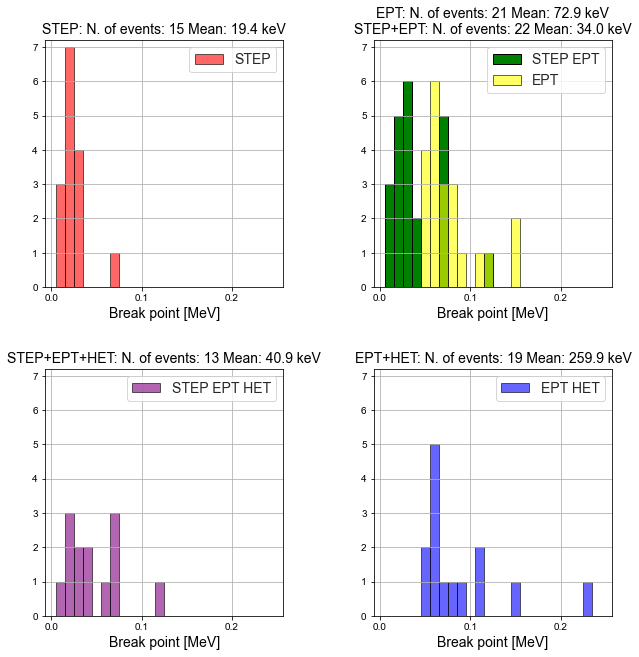

In [7]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)
b = np.arange(0,0.25,0.01)
maxlim = 7.2
ax[1,0].hist(step_ept_het['break_point_mev'], bins=b, align='right', color='purple', edgecolor='black', label = 'STEP EPT HET', alpha = 0.6)
ax[0,1].hist(step_ept['break_point_mev'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 1)
ax[1,1].hist(ept_het['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.6)
ax[0,0].hist(step['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.6)
ax[0,1].hist(ept['break_point_mev'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.6)


ax[0,0].set_xlabel('Break point [MeV]', size=s)
ax[0,1].set_xlabel('Break point [MeV]', size=s)
ax[1,0].set_xlabel('Break point [MeV]', size=s)
ax[1,0].set_xlabel('Break point [MeV]', size=s)
ax[1,1].set_xlabel('Break point [MeV]', size=s)


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0,maxlim)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0,maxlim)
#ax[1,0].legend(prop={'size': s})

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(0,maxlim)


ax[1,0].set_title('STEP+EPT+HET: N. of events: '+str(n_step_ept_het)+' Mean: '+str(mean_step_ept_het)+' keV', size=s)
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept)+' keV'+'\n'+'STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept)+' keV', size=s)
ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step)+' keV', size=s)
ax[1,1].set_title('EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het)+' keV', size=s)


#plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

#plt.xticks(size=10)
#plt.yticks(size=10)


In [10]:
step_ept_het = data.where((data.type_of_fit == "step_ept_het") & (data.Date >np.datetime64('2021-10-12')), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept = data.where((data.type_of_fit == "step_ept") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het = data.where((data.type_of_fit == "ept_het") & (data.Date >np.datetime64('2021-10-29')) , np.nan)
step = data.where((data.type_of_fit == "step" ) , np.nan)
ept = data.where((data.type_of_fit == "ept") , np.nan)


In [11]:
ept_het.count()

Source.Name                    9
Reduced chi sq                 9
c1                             9
c1_err                         9
gamma1                         9
gamma1_err                     9
gamma2                         8
gamma2_err                     8
break_point_mev                8
break_point_err_mev            8
final_fit_type                 9
exp_cutoff_point_mev           4
cutoff_err_mev                 4
alpha                          8
year                           9
month                          9
day                            9
time                           9
fit                            9
Source.Name                    9
Date                           9
averaging                      9
Direction                      9
Data type                      9
distance_au                    9
STEP                           9
EPT                            9
HET                            9
Sigma                          9
Relative error                 9
Fraction o

In [12]:
n_step_ept_het = str(step_ept_het['break_point_mev'].count())
n_step_ept = str(step_ept['break_point_mev'].count())
n_ept_het = str(ept_het['break_point_mev'].count())
n_step = str(step['break_point_mev'].count())
n_ept = str(ept['break_point_mev'].count())

mean_step_ept = np.round(step_ept['break_point_mev'].mean()*1000,decimals=1)
mean_step = np.round(step['break_point_mev'].mean()*1000,decimals=1)
mean_ept = np.round(ept['break_point_mev'].mean()*1000,decimals=1)
mean_ept_het = np.round(ept_het['break_point_mev'].mean()*1000,decimals=1)

std_step_ept = np.round(step_ept['break_point_mev'].std()*1000,decimals=1)
std_step = np.round(step['break_point_mev'].std()*1000,decimals=1)
std_ept = np.round(ept['break_point_mev'].std()*1000,decimals=1)
std_ept_het = np.round(ept_het['break_point_mev'].std()*1000,decimals=1)


print(std_step_ept )
print(std_step )
print(std_ept )
print(std_ept_het)


26.7
13.2
30.5
147.3


In [15]:
n_step_ept_het_cut = str(step_ept_het['exp_cutoff_point_mev'].count())
n_step_ept_cut = str(step_ept['exp_cutoff_point_mev'].count())
n_ept_het_cut = str(ept_het['exp_cutoff_point_mev'].count())
n_step_cut = str(step['exp_cutoff_point_mev'].count())
n_ept_cut = str(ept['exp_cutoff_point_mev'].count())

mean_step_ept_cut = np.round(step_ept['exp_cutoff_point_mev'].mean()*1000,decimals=1)
mean_step_cut = np.round(step['exp_cutoff_point_mev'].mean()*1000,decimals=1)
mean_ept_cut = np.round(ept['exp_cutoff_point_mev'].mean()*1000,decimals=1)
mean_ept_het_cut = np.round(ept_het['exp_cutoff_point_mev'].mean()*1000,decimals=1)

std_step_ept_cut = np.round(step_ept['exp_cutoff_point_mev'].std()*1000,decimals=1)
std_step_cut = np.round(step['exp_cutoff_point_mev'].std()*1000,decimals=1)
std_ept_cut = np.round(ept['exp_cutoff_point_mev'].std()*1000,decimals=1)
std_ept_het_cut = np.round(ept_het['exp_cutoff_point_mev'].std()*1000,decimals=1)


print(n_step_ept_cut )
print(n_step_cut)
print(n_ept_cut )
print(n_ept_het_cut)

print(mean_step_ept_cut )
print(mean_step_cut)
print(mean_ept_cut )
print(mean_ept_het_cut)

print(std_step_ept_cut )
print(std_step_cut)
print(std_ept_cut )
print(std_ept_het_cut)


4
3
2
4
150.7
63.0
84.7
779.4
44.1
6.4
2.7
599.1


In [275]:
ept.max()

C:\Users\Omistaja\AppData\Local\Temp\ipykernel_12960\372236189.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ept.max()


Reduced chi sq                            1.389565
c1                                    78405.614686
c1_err                                 8919.990131
gamma1                                   -0.984339
gamma1_err                                5.356562
gamma2                                   -2.305011
gamma2_err                                7.284428
break_point_mev                           0.146492
break_point_err_mev                       0.354521
exp_cutoff_point_mev                      0.086655
cutoff_err_mev                            0.134883
alpha                                   386.263525
year                                        2022.0
month                                         12.0
day                                           29.0
time                                        2352.0
Date                           2022-03-14 00:00:00
distance_au                                   1.01
STEP                                          True
EPT                            

Text(0.5, 1.0, 'EPT+HET: N. of events: 8 Mean: 164.8 keV')

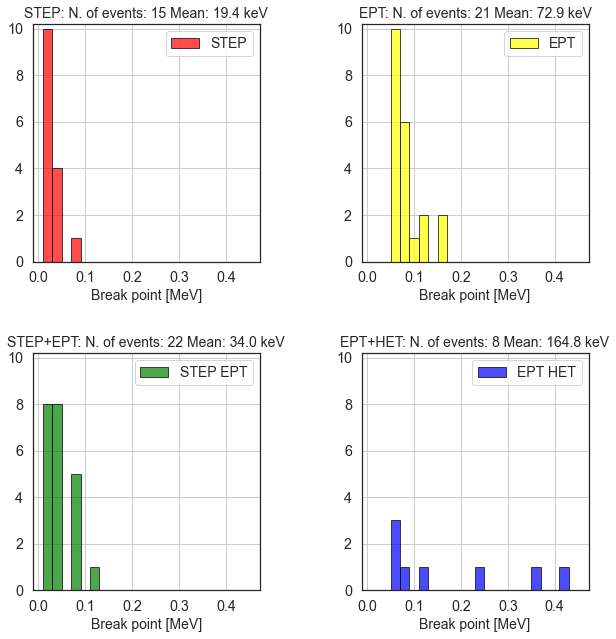

In [276]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)
b = np.arange(0,0.45,0.02)
maxlim = 10.2

ax[0,0].hist(step['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[0,1].hist(ept['break_point_mev'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.7)
ax[1,0].hist(step_ept['break_point_mev'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[1,1].hist(ept_het['break_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.7)


ax[0,0].set_xlabel('Break point [MeV]', size=s)
ax[0,1].set_xlabel('Break point [MeV]', size=s)
ax[1,0].set_xlabel('Break point [MeV]', size=s)
ax[1,1].set_xlabel('Break point [MeV]', size=s)


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0,maxlim)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(0,maxlim)


ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step)+' keV', size=s)
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept)+' keV', size=s)
ax[1,0].set_title('STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept)+' keV', size=s)
ax[1,1].set_title('EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het)+' keV', size=s)



Text(0.5, 1.0, 'EPT: N. of events: 21')

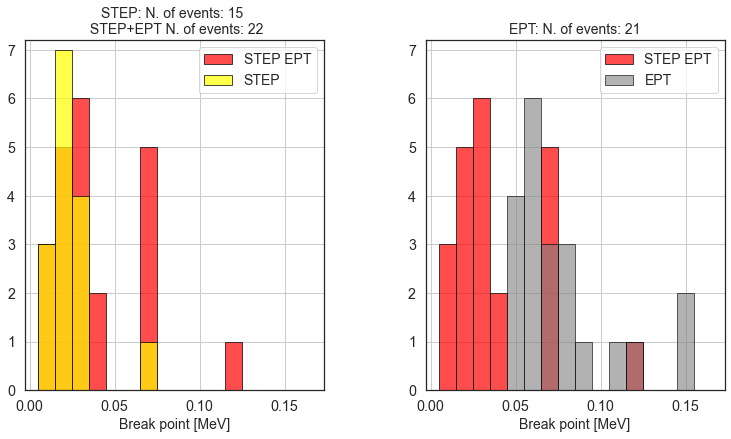

In [18]:
f, ax = plt.subplots(1,2, figsize=(12,7)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)
b = np.arange(0,0.17,0.01)
maxlim = 7.2

ax[0].hist(step_ept['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[0].hist(step['break_point_mev'], bins=b, align='right', color='yellow', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[0].set_xlabel('Break point [MeV]', size=s)

ax[1].hist(step_ept['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[1].hist(ept['break_point_mev'], bins=b, align='right', color='gray', edgecolor='black', label = 'EPT', alpha = 0.6)
ax[1].set_xlabel('Break point [MeV]', size=s)

ax[0].grid()
ax[0].legend(prop={'size': s})
ax[0].set_ylim(0,maxlim)

ax[1].grid()
ax[1].legend(prop={'size': s})
ax[1].set_ylim(0,maxlim)

ax[0].set_title('STEP: N. of events: '+str(n_step)+' \n STEP+EPT N. of events: '+str(n_step_ept), size=s)
ax[1].set_title('EPT: N. of events: '+str(n_ept), size=s)


Text(0.5, 1.0, 'EPT+HET: N. of events: 8 Mean: 164.8 keV')

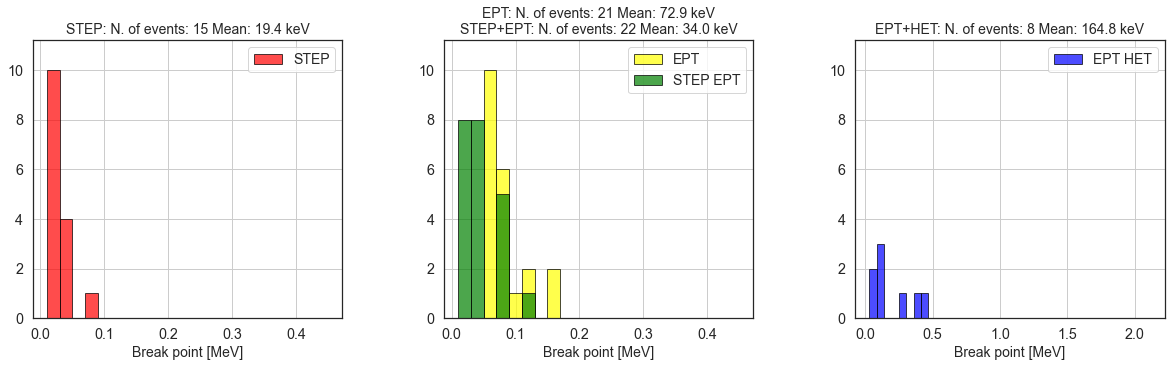

In [278]:
f, ax = plt.subplots(1,3, figsize=(18,6)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)

t = np.arange(0,0.45,0.1)
b = np.arange(0,0.45,0.02)
maxlim = 11.2


for i in range(3):
    ax[i].tick_params(axis='x', which='minor', labelsize=s, size = s)
    
ax[0].hist(step['break_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[1].hist(ept['break_point_mev'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.7)
ax[1].hist(step_ept['break_point_mev'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[2].hist(ept_het['break_point_mev'], bins=np.arange(0,2.1,0.055), align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.7)


ax[0].set_xlabel('Break point [MeV]', size=s)
ax[1].set_xlabel('Break point [MeV]', size=s)
ax[2].set_xlabel('Break point [MeV]', size=s)

#ax[0].set_xticks(ticks = t, ticksize=s)

ax[0].grid()
ax[0].legend(prop={'size': s})
ax[0].set_ylim(0,maxlim)

ax[1].grid()
ax[1].legend(prop={'size': s})
ax[1].set_ylim(0,maxlim)

ax[2].grid()
ax[2].legend(prop={'size': s})
ax[2].set_ylim(0,maxlim)


ax[0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step)+' keV', size = s)
ax[1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept)+' keV'+'\n'+'STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept)+' keV', size = s)
ax[2].set_title('EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het)+' keV', size = s)


#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))


In [279]:
n_step_ept_het = str(step_ept_het['gamma1'].count())
n_step_ept = str(step_ept['gamma1'].count())
n_ept_het = str(ept_het['gamma1'].count())
n_step = str(step['gamma1'].count())
n_ept = str(ept['gamma1'].count())

mean_step_ept = np.round(step_ept['gamma1'].mean(),decimals=2)
mean_step = np.round(step['gamma1'].mean(),decimals=2)
mean_ept = np.round(ept['gamma1'].mean(),decimals=2)
mean_ept_het = np.round(ept_het['gamma1'].mean(),decimals=2)


std_step_ept = np.round(step_ept['gamma1'].std(),decimals=1)
std_step = np.round(step['gamma1'].std(),decimals=1)
std_ept = np.round(ept['gamma1'].std(),decimals=1)
std_ept_het = np.round(ept_het['gamma1'].std(),decimals=1)

print(std_step_ept )
print(std_step )
print(std_ept )
print(std_ept_het)


0.8
0.7
0.7
3.3


Text(0.5, 1.0, 'EPT+HET: N. of events: 9 Mean: -3.18')

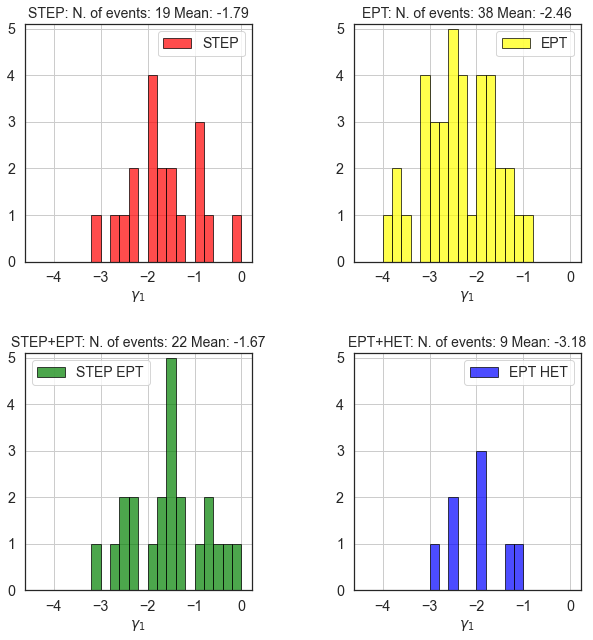

In [280]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)

b = np.arange(-4.5,0,0.2)
maxlim = 5.1

ax[0,0].hist(step['gamma1'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[0,1].hist(ept['gamma1'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.7)
ax[1,0].hist(step_ept['gamma1'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[1,1].hist(ept_het['gamma1'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.7)


ax[0,0].set_xlabel(r'$\gamma_1$', size=s)
ax[0,1].set_xlabel(r'$\gamma_1$', size=s)
ax[1,0].set_xlabel(r'$\gamma_1$', size=s)
ax[1,1].set_xlabel(r'$\gamma_1$', size=s)


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0,maxlim)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(0,maxlim)


ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step), size=s)
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept), size=s)
ax[1,0].set_title('STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept), size=s)
ax[1,1].set_title('EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het), size=s)




In [281]:
#step_ept_het_single = data.where((data.type_of_fit == "step_ept_het")&(data.final_fit_type == "single"), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept_single = data.where((data.type_of_fit == "step_ept")&(data.final_fit_type == "single") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het_single = data.where((data.type_of_fit == "ept_het") &(data.final_fit_type == "single") , np.nan)
step_single = data.where((data.type_of_fit == "step" )&(data.final_fit_type == "single") , np.nan)
ept_single = data.where((data.type_of_fit == "ept")&(data.final_fit_type == "single") , np.nan)


In [283]:
#step_ept_het_single = data.where((data.type_of_fit == "step_ept_het")&(data.final_fit_type == "single"), np.nan)# & (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.6859485403) , np.nan)
step_ept_single_cut = data.where((data.type_of_fit == "step_ept")&(data.final_fit_type == "cut") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het_single_cut = data.where((data.type_of_fit == "ept_het") &(data.final_fit_type == "cut") , np.nan)
step_single_cut = data.where((data.type_of_fit == "step" )&(data.final_fit_type == "cut") , np.nan)
ept_single_cut = data.where((data.type_of_fit == "ept")&(data.final_fit_type == "cut") , np.nan)


In [287]:
#n_step_ept_het = str(step_ept_het_single['gamma1'].count())
n_step_ept_cut = str(step_ept_single_cut['gamma1'].count())
n_ept_het_cut = str(ept_het_single_cut['gamma1'].count())
n_step_cut = str(step_single_cut['gamma1'].count())
n_ept_cut = str(ept_single_cut['gamma1'].count())

mean_step_ept_cut = np.round(step_ept_single_cut['gamma1'].mean(),decimals=2)
mean_step_cut = np.round(step_single_cut['gamma1'].mean(),decimals=2)
mean_ept_cut = np.round(ept_single_cut['gamma1'].mean(),decimals=2)
mean_ept_het_cut = np.round(ept_het_single_cut['gamma1'].mean(),decimals=2)

std_step_ept_cut = np.round(step_ept_single_cut['gamma1'].std(),decimals=1)
std_step_cut = np.round(step_single_cut['gamma1'].std(),decimals=1)
std_ept_cut = np.round(ept_single_cut['gamma1'].std(),decimals=1)
std_ept_het_cut = np.round(ept_het_single_cut['gamma1'].std(),decimals=1)

print(std_step_ept_cut )
print(std_step_cut )
print(std_ept_cut )
print(std_ept_het_cut)

print(n_step_ept_cut)
print(n_ept_het_cut)
print(n_step_cut)
print(n_ept_cut)

nan
nan
nan
0.3
0
2
1
1


In [282]:
#n_step_ept_het = str(step_ept_het_single['gamma1'].count())
n_step_ept = str(step_ept_single['gamma1'].count())
n_ept_het = str(ept_het_single['gamma1'].count())
n_step = str(step_single['gamma1'].count())
n_ept = str(ept_single['gamma1'].count())

mean_step_ept = np.round(step_ept_single['gamma1'].mean(),decimals=2)
mean_step = np.round(step_single['gamma1'].mean(),decimals=2)
mean_ept = np.round(ept_single['gamma1'].mean(),decimals=2)
mean_ept_het = np.round(ept_het_single['gamma1'].mean(),decimals=2)

std_step_ept = np.round(step_ept_single['gamma1'].std(),decimals=1)
std_step = np.round(step_single['gamma1'].std(),decimals=1)
std_ept = np.round(ept_single['gamma1'].std(),decimals=1)
std_ept_het = np.round(ept_het_single['gamma1'].std(),decimals=1)

print(std_step_ept )
print(std_step )
print(std_ept )
print(std_ept_het)


nan
0.5
0.7
nan


Text(0.5, 1.0, 'EPT: N. of events: 16 Mean: -2.65')

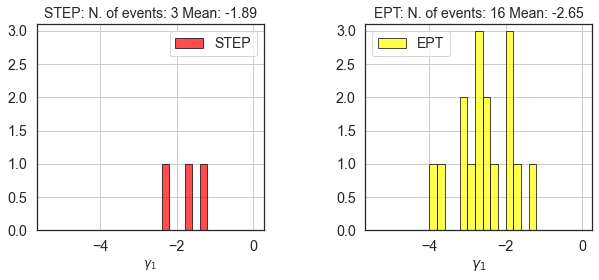

In [182]:
f, ax = plt.subplots(1,2, figsize=(10,5)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)

b = np.arange(-5.5,0,0.2)
maxlim = 3.1

ax[0].hist(step_single['gamma1'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[1].hist(ept_single['gamma1'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.7)

ax[0].set_xlabel(r'$\gamma_1$', size=12)
ax[1].set_xlabel(r'$\gamma_1$', size=s)

ax[0].grid()
ax[0].legend(prop={'size': s})
ax[0].set_ylim(0,maxlim)

ax[1].grid()
ax[1].legend(prop={'size': s})
ax[1].set_ylim(0,maxlim)

ax[0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step), size=s)
ax[1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept), size=s)



In [208]:
step_ept_else = data.where((data.type_of_fit == "step_ept")&(data.final_fit_type != "cut")&(data.final_fit_type != "single") , np.nan)#& (data.min_e_mev<0.03295087252) & (data.max_e_mev >0.07803193193) , np.nan)
ept_het_else = data.where((data.type_of_fit == "ept_het") &(data.final_fit_type != "cut")&(data.final_fit_type != "single") , np.nan)
step_else = data.where((data.type_of_fit == "step" )&(data.final_fit_type != "cut") &(data.final_fit_type != "single"), np.nan)
ept_else = data.where((data.type_of_fit == "ept")&(data.final_fit_type != "cut") &(data.final_fit_type != "single"), np.nan)


In [209]:
n_step_ept = str(step_ept_else['gamma1'].count())
n_ept_het = str(ept_het_else['gamma1'].count())
n_step = str(step_else['gamma1'].count())
n_ept = str(ept_else['gamma1'].count())

mean_step_ept = np.round(step_ept_else['gamma1'].mean(),decimals=2)
mean_step = np.round(step_else['gamma1'].mean(),decimals=2)
mean_ept = np.round(ept_else['gamma1'].mean(),decimals=2)
mean_ept_het = np.round(ept_het_else['gamma1'].mean(),decimals=2)

std_step_ept = np.round(step_ept_else['gamma1'].std(),decimals=1)
std_step = np.round(step_else['gamma1'].std(),decimals=1)
std_ept = np.round(ept_else['gamma1'].std(),decimals=1)
std_ept_het = np.round(ept_het_else['gamma1'].std(),decimals=1)

print(std_step_ept )
print(std_step )
print(std_ept )
print(std_ept_het)


0.8
0.8
0.8
2.3


Text(0.5, 1.0, 'EPT+HET: N. of events: 19 Mean: -2.59')

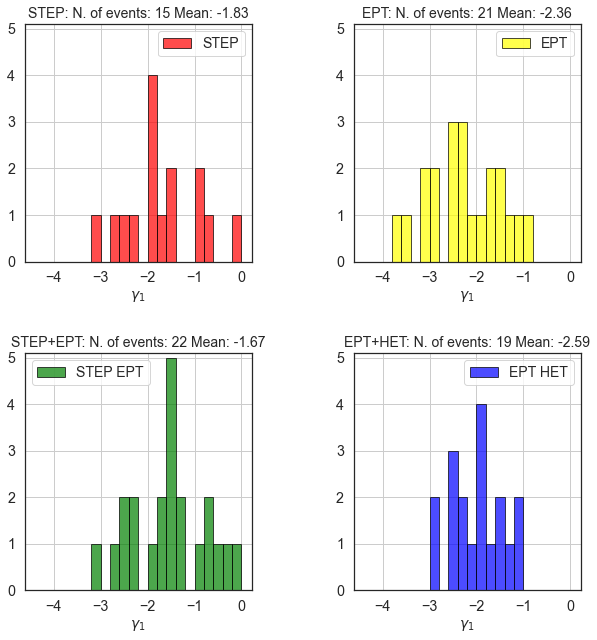

In [185]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)

b = np.arange(-4.5,0,0.2)
maxlim = 5.1

ax[0,0].hist(step_else['gamma1'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[0,1].hist(ept_else['gamma1'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.7)
ax[1,0].hist(step_ept_else['gamma1'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[1,1].hist(ept_het_else['gamma1'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.7)


ax[0,0].set_xlabel(r'$\gamma_1$', size=s)
ax[0,1].set_xlabel(r'$\gamma_1$', size=s)
ax[1,0].set_xlabel(r'$\gamma_1$', size=s)
ax[1,1].set_xlabel(r'$\gamma_1$', size=s)


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0,maxlim)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(0,maxlim)


ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step), size=s)
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept), size=s)
ax[1,0].set_title('STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept), size=s)
ax[1,1].set_title('EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het), size=s)



In [210]:
n_step_ept_het = str(step_ept_het['gamma2'].count())
n_step_ept = str(step_ept['gamma2'].count())
n_ept_het = str(ept_het['gamma2'].count())
n_step = str(step['gamma2'].count())
n_ept = str(ept['gamma2'].count())

mean_step_ept = np.round(step_ept['gamma2'].mean(),decimals=2)
mean_step = np.round(step['gamma2'].mean(),decimals=2)
mean_ept = np.round(ept['gamma2'].mean(),decimals=2)
mean_ept_het = np.round(ept_het['gamma2'].mean(),decimals=2)

std_step_ept = np.round(step_ept['gamma2'].std(),decimals=1)
std_step = np.round(step['gamma2'].std(),decimals=1)
std_ept = np.round(ept['gamma2'].std(),decimals=1)
std_ept_het = np.round(ept_het['gamma2'].std(),decimals=1)

print(std_step_ept )
print(std_step )
print(std_ept )
print(std_ept_het)



1.2
1.1
1.0
4.9


In [187]:
ept_het['gamma2'].min()

-17.3524082458658

Text(0.5, 1.0, 'EPT+HET: N. of events: 8 Mean: -5.36')

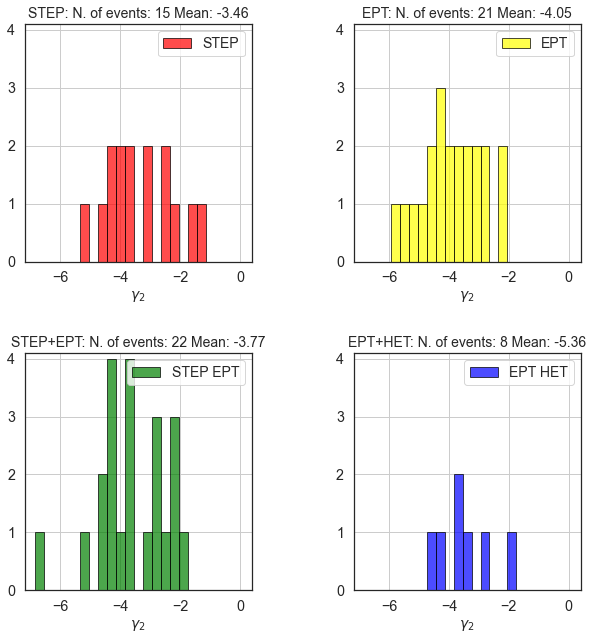

In [188]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)

b = np.arange(-7,0,0.3)
maxlim = 4.1

ax[0,0].hist(step['gamma2'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[0,1].hist(ept['gamma2'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.7)
ax[1,0].hist(step_ept['gamma2'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[1,1].hist(ept_het['gamma2'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.7)


ax[0,0].set_xlabel(r'$\gamma_2$', size=s)
ax[0,1].set_xlabel(r'$\gamma_2$', size=s)
ax[1,0].set_xlabel(r'$\gamma_2$', size=s)
ax[1,1].set_xlabel(r'$\gamma_2$', size=s)


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0,maxlim)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(0,maxlim)

ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step), size=s)
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept), size=s)
ax[1,0].set_title('STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept), size=s)
ax[1,1].set_title('EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het), size=s)




In [112]:
n_step_ept_het = str(step_ept_het['alpha'].count())
n_step_ept = str(step_ept['alpha'].count())
n_ept_het = str(ept_het['alpha'].count())
n_step = str(step['alpha'].count())
n_ept = str(ept['alpha'].count())

mean_step_ept = np.round(step_ept['alpha'].mean(),decimals=2)
mean_step = np.round(step['alpha'].mean(),decimals=2)
mean_ept = np.round(ept['alpha'].mean(),decimals=2)
mean_ept_het = np.round(ept_het['alpha'].mean(),decimals=2)


In [113]:
ept.alpha.max()

386.2635251560832

Text(0.5, 1.0, 'EPT+HET: N. of events: 8 Mean: 123.41')

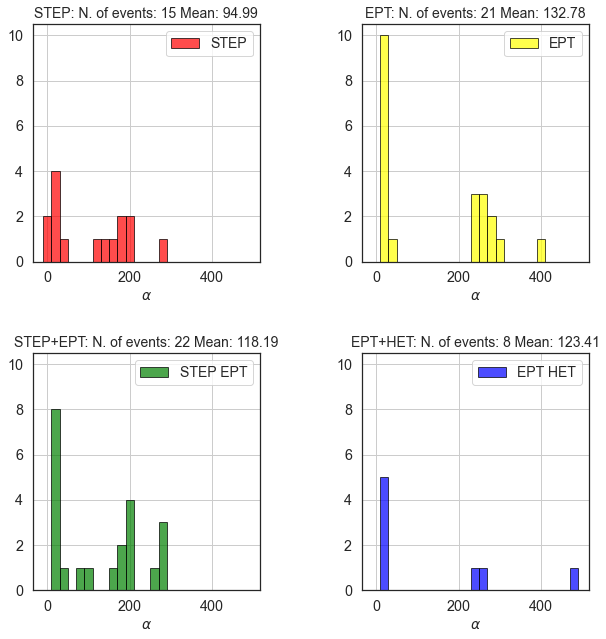

In [114]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)

b = np.arange(-20,500,20)
maxlim = 10.5

ax[0,0].hist(step['alpha'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[0,1].hist(ept['alpha'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.7)
ax[1,0].hist(step_ept['alpha'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[1,1].hist(ept_het['alpha'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.7)


ax[0,0].set_xlabel(r'$\alpha$', size=s)
ax[0,1].set_xlabel(r'$\alpha$', size=s)
ax[1,0].set_xlabel(r'$\alpha$', size=s)
ax[1,1].set_xlabel(r'$\alpha$', size=s)


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0,maxlim)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(0,maxlim)

ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step), size = s)
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept), size = s)
ax[1,0].set_title('STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept), size = s)
ax[1,1].set_title('EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het), size = s)




In [115]:
n_step_ept_het = str(step_ept_het['exp_cutoff_point_mev'].count())
n_step_ept = str(step_ept['exp_cutoff_point_mev'].count())
n_ept_het = str(ept_het['exp_cutoff_point_mev'].count())
n_step = str(step['exp_cutoff_point_mev'].count())
n_ept = str(ept['exp_cutoff_point_mev'].count())

mean_step_ept = np.round(step_ept['exp_cutoff_point_mev'].mean()*1000,decimals=1)
mean_step = np.round(step['exp_cutoff_point_mev'].mean()*1000,decimals=1)
mean_ept = np.round(ept['exp_cutoff_point_mev'].mean()*1000,decimals=1)
mean_ept_het = np.round(ept_het['exp_cutoff_point_mev'].mean()*1000,decimals=1)


Text(0.5, 1.0, 'EPT: N. of events: 2 Mean: 84.7 keV\nEPT+HET: N. of events: 4 Mean: 779.4 keV')

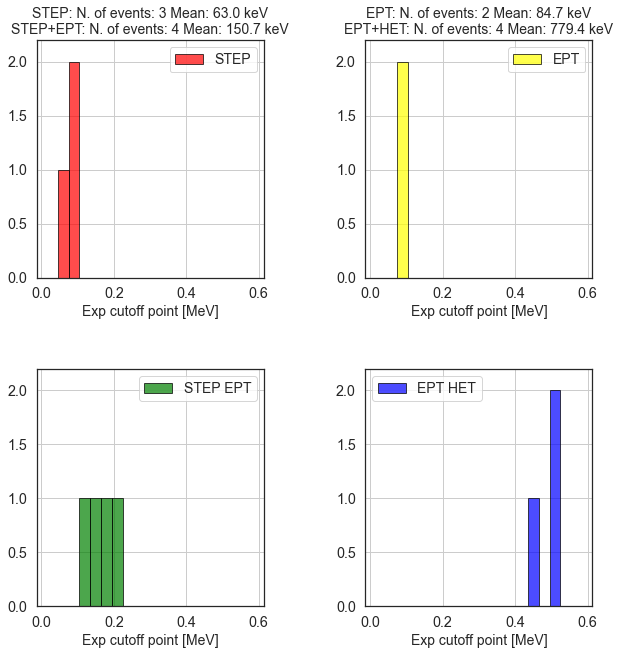

In [116]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)

b = np.arange(0,0.6,0.03)
maxlim = 2.2

ax[0,0].hist(step['exp_cutoff_point_mev'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.7)
ax[0,1].hist(ept['exp_cutoff_point_mev'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.7)
ax[1,0].hist(step_ept['exp_cutoff_point_mev'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.7)
ax[1,1].hist(ept_het['exp_cutoff_point_mev'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.7)


ax[0,0].set_xlabel('Exp cutoff point [MeV]', size=s)
ax[0,1].set_xlabel('Exp cutoff point [MeV]', size=s)
ax[1,0].set_xlabel('Exp cutoff point [MeV]', size=s)
ax[1,1].set_xlabel('Exp cutoff point [MeV]', size=s)


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0,maxlim)

ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': s})
ax[1,1].set_ylim(0,maxlim)


ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step)+' keV'+'\n'+'STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept)+' keV', size = s)
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept)+' keV'+'\n'+'EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het)+' keV', size = s)



In [117]:
n_step_ept_het = str(step_ept_het['c1'].count())
n_step_ept = str(step_ept['c1'].count())
n_ept_het = str(ept_het['c1'].count())
n_step = str(step['c1'].count())
n_ept = str(ept['c1'].count())

mean_step_ept = np.round(step_ept['c1'].mean(),decimals=1)
mean_step = np.round(step['c1'].mean(),decimals=1)
mean_ept = np.round(ept['c1'].mean(),decimals=1)
mean_ept_het = np.round(ept_het['c1'].mean(),decimals=1)


Text(0.5, 1.0, 'EPT: N. of events: 38 Mean: 6421.8 MeV\nEPT+HET: N. of events: 9 Mean: 8875.0 MeV')

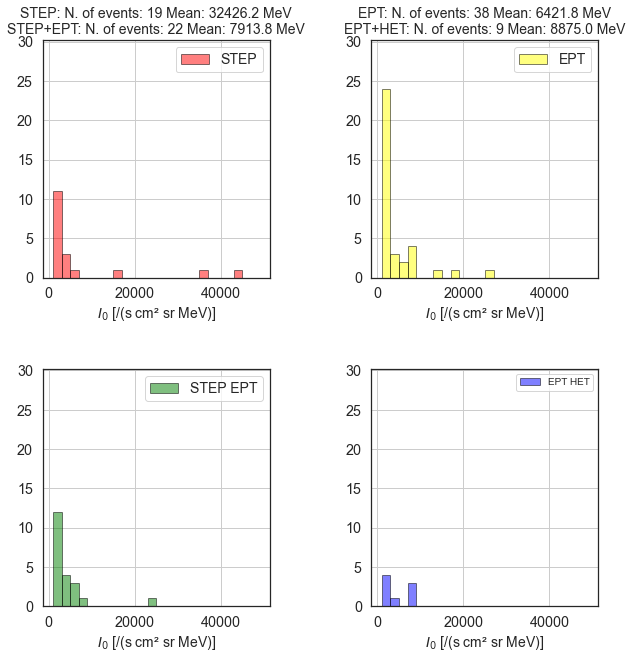

In [118]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 
sns.set_theme(style="white",font_scale = 1.3)
s = 14
f.tight_layout(pad=4.0)

b = np.arange(0,50000,2000)
maxlim = 30.2

ax[0,0].hist(step['c1'], bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.5)
ax[0,1].hist(ept['c1'], bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.5)
ax[1,0].hist(step_ept['c1'], bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.5)
ax[1,1].hist(ept_het['c1'], bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.5)


ax[0,0].set_xlabel('$I_0 $ [/(s cm² sr MeV)]', size=s)
ax[0,1].set_xlabel('$I_0 $ [/(s cm² sr MeV)]', size=s)
ax[1,0].set_xlabel('$I_0 $ [/(s cm² sr MeV)]', size=s)
ax[1,1].set_xlabel('$I_0 $ [/(s cm² sr MeV)]', size=s)


ax[0,0].grid()
ax[0,0].legend(prop={'size': s})
ax[0,0].set_ylim(0,maxlim)


ax[0,1].grid()
ax[0,1].legend(prop={'size': s})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': s})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': 10})
ax[1,1].set_ylim(0,maxlim)

#ax[0,0].set_xscale('log')
#ax[0,1].set_xscale('log')
#ax[1,0].set_xscale('log')
#ax[1,1].set_xscale('log')

ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step)+' MeV'+'\n'+'STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept)+' MeV', size = s)
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept)+' MeV'+'\n'+'EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het)+' MeV', size = s)



In [119]:
# calculate intensity at break energy
ept_break_int = []
ept_break_int_err = []

for i in range(len(ept)):
    intensity_ept = ept.c1[i]*(ept.break_point_mev[i]/0.1)**ept.gamma1[i] *((ept.break_point_mev[i]**ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_mev[i]**ept.alpha[i]))**((ept.gamma2[i]-ept.gamma1[i])/ept.alpha[i])
    ept_break_int.append(intensity_ept)
    intensity_err_ept = ept.c1_err[i]*(ept.break_point_err_mev[i]/0.1)**ept.gamma1_err[i] *((ept.break_point_err_mev[i]**ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_err_mev[i]**ept.alpha[i]))**((ept.gamma2_err[i]-ept.gamma1_err[i])/ept.alpha[i])
    ept_break_int_err.append(intensity_err_ept)

    
ept_het_break_int = []
ept_het_break_int_err = []

for i in range(len(ept_het)):
    intensity_ept_het = ept_het.c1[i]*(ept_het.break_point_mev[i]/0.1)**ept_het.gamma1[i] *((ept_het.break_point_mev[i]**ept_het.alpha[i]*2)/(0.1**ept_het.alpha[i]+ept_het.break_point_mev[i]**ept_het.alpha[i]))**((ept_het.gamma2[i]-ept_het.gamma1[i])/ept_het.alpha[i])
    ept_het_break_int.append(intensity_ept_het)
    intensity_err_ept_het = ept_het.c1_err[i]*(ept_het.break_point_err_mev[i]/0.1)**ept_het.gamma1_err[i] *((ept_het.break_point_err_mev[i]**ept_het.alpha[i]*2)/(0.1**ept_het.alpha[i]+ept_het.break_point_err_mev[i]**ept_het.alpha[i]))**((ept_het.gamma2_err[i]-ept_het.gamma1_err[i])/ept_het.alpha[i])
    ept_het_break_int_err.append(intensity_err_ept_het)

step_ept_break_int = []
step_ept_break_int_err = []

for i in range(len(step_ept)):
    intensity_step_ept = step_ept.c1[i]*(step_ept.break_point_mev[i]/0.1)**step_ept.gamma1[i] *((step_ept.break_point_mev[i]**step_ept.alpha[i]*2)/(0.1**step_ept.alpha[i]+step_ept.break_point_mev[i]**step_ept.alpha[i]))**((step_ept.gamma2[i]-step_ept.gamma1[i])/step_ept.alpha[i])
    step_ept_break_int.append(intensity_step_ept)
    intensity_err_step_ept = step_ept.c1_err[i]*(step_ept.break_point_err_mev[i]/0.1)**step_ept.gamma1_err[i] *((step_ept.break_point_err_mev[i]**step_ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_err_mev[i]**step_ept.alpha[i]))**((step_ept.gamma2_err[i]-step_ept.gamma1_err[i])/step_ept.alpha[i])
    step_ept_break_int_err.append(intensity_err_step_ept)

    
step_break_int = []
step_break_int_err = []

for i in range(len(step)):
    intensity_step = step.c1[i]*(step.break_point_mev[i]/0.1)**step.gamma1[i] *((step.break_point_mev[i]**step.alpha[i]*2)/(0.1**step.alpha[i]+step.break_point_mev[i]**step.alpha[i]))**((step.gamma2[i]-step.gamma1[i])/step.alpha[i])
    step_break_int.append(intensity_step)
    intensity_err_step = step.c1_err[i]*(step.break_point_err_mev[i]/0.1)**step.gamma1_err[i] *((step.break_point_err_mev[i]**step.alpha[i]*2)/(0.1**step.alpha[i]+step.break_point_err_mev[i]**step.alpha[i]))**((step.gamma2_err[i]-step.gamma1_err[i])/step.alpha[i])
    step_break_int_err.append(intensity_err_step)


C:\Users\Omistaja\AppData\Local\Temp\ipykernel_12960\1527925462.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  intensity_err_ept = ept.c1_err[i]*(ept.break_point_err_mev[i]/0.1)**ept.gamma1_err[i] *((ept.break_point_err_mev[i]**ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_err_mev[i]**ept.alpha[i]))**((ept.gamma2_err[i]-ept.gamma1_err[i])/ept.alpha[i])
C:\Users\Omistaja\AppData\Local\Temp\ipykernel_12960\1527925462.py:8: RuntimeWarning: invalid value encountered in double_scalars
  intensity_err_ept = ept.c1_err[i]*(ept.break_point_err_mev[i]/0.1)**ept.gamma1_err[i] *((ept.break_point_err_mev[i]**ept.alpha[i]*2)/(0.1**ept.alpha[i]+ept.break_point_err_mev[i]**ept.alpha[i]))**((ept.gamma2_err[i]-ept.gamma1_err[i])/ept.alpha[i])
C:\Users\Omistaja\AppData\Local\Temp\ipykernel_12960\1527925462.py:18: RuntimeWarning: overflow encountered in double_scalars
  intensity_err_ept_het = ept_het.c1_err[i]*(ept_het.break_point_err_mev[i]/0.1)**ept_het.gamma1_err[i] *((ept_

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

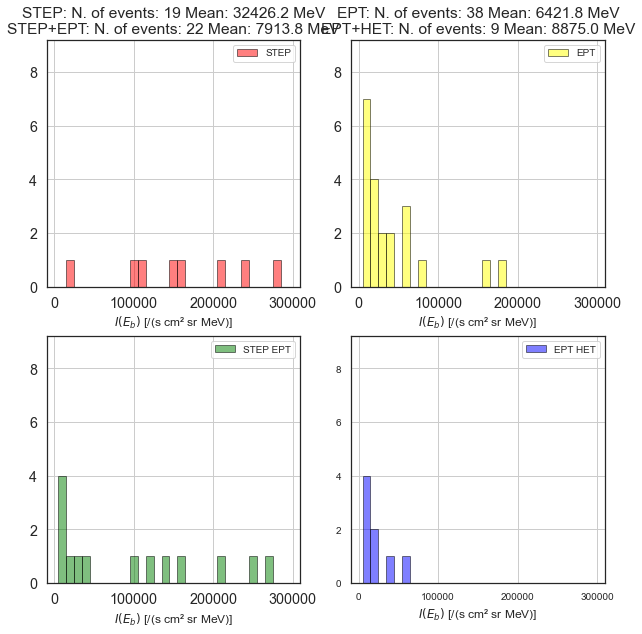

In [120]:
f, ax = plt.subplots(2,2, figsize=(10,10)) 

b = np.arange(0,300000,10000)
maxlim = 9.2

ax[0,0].hist(step_break_int, bins=b, align='right', color='red', edgecolor='black', label = 'STEP', alpha = 0.5)
ax[0,1].hist(ept_break_int, bins=b, align='right', color='yellow', edgecolor='black', label = 'EPT', alpha = 0.5)
ax[1,0].hist(step_ept_break_int, bins=b, align='right', color='green', edgecolor='black', label = 'STEP EPT', alpha = 0.5)
ax[1,1].hist(ept_het_break_int, bins=b, align='right', color='blue', edgecolor='black', label = 'EPT HET', alpha = 0.5)


ax[0,0].set_xlabel('$I(E_b) $ [/(s cm² sr MeV)]', size=12)
ax[0,1].set_xlabel('$I(E_b) $ [/(s cm² sr MeV)]', size=12)
ax[1,0].set_xlabel('$I(E_b) $ [/(s cm² sr MeV)]', size=12)
ax[1,1].set_xlabel('$I(E_b) $ [/(s cm² sr MeV)]', size=12)


ax[0,0].grid()
ax[0,0].legend(prop={'size': 10})
ax[0,0].set_ylim(0,maxlim)


ax[0,1].grid()
ax[0,1].legend(prop={'size': 10})
ax[0,1].set_ylim(0,maxlim)

ax[1,0].grid()
ax[1,0].legend(prop={'size': 10})
ax[1,0].set_ylim(0,maxlim)

ax[1,1].grid()
ax[1,1].legend(prop={'size': 10})
ax[1,1].set_ylim(0,maxlim)

#ax[0,0].set_xscale('log')
#ax[0,1].set_xscale('log')
#ax[1,0].set_xscale('log')
#ax[1,1].set_xscale('log')

ax[0,0].set_title('STEP: N. of events: '+str(n_step)+' Mean: '+str(mean_step)+' MeV'+'\n'+'STEP+EPT: N. of events: '+str(n_step_ept)+' Mean: '+str(mean_step_ept)+' MeV')
ax[0,1].set_title('EPT: N. of events: '+str(n_ept)+' Mean: '+str(mean_ept)+' MeV'+'\n'+'EPT+HET: N. of events: '+str(n_ept_het)+' Mean: '+str(mean_ept_het)+' MeV')

plt.tick_params(axis='x', which='minor', labelsize=10)
#ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))

plt.xticks(size=10)
plt.yticks(size=10)
